#  PART I

# question 4 

C:\Users\vince\AppData\Local\Temp\ipykernel_44884\2339804208.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =pd.read_csv(r'C:\Users\vince\Desktop\M1\MODS\ECO_4MO11_TP - Econometrics\TP econometrics\textfiles\HPRICE2.raw',delim_whitespace=True,header=None)


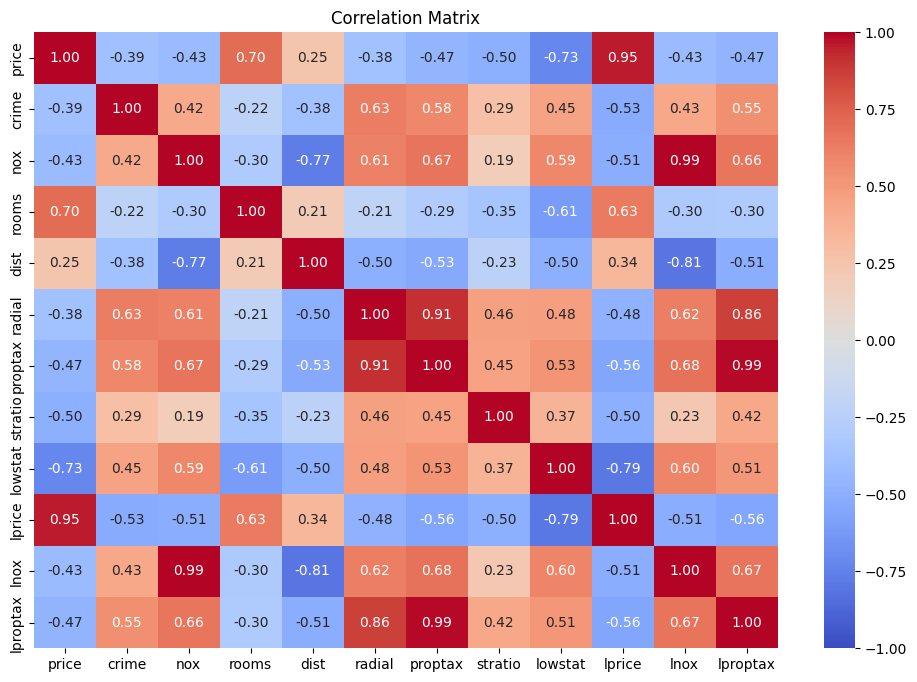

    Variable           VIF
0      const  13293.568547
1      crime      1.747273
2        nox    136.216832
3      rooms      1.783798
4       dist      4.216532
5     radial      9.700952
6    proptax    106.940076
7    stratio      1.749908
8    lowstat      2.481206
9       lnox    160.664284
10  lproptax     70.952610


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df =pd.read_csv(r'C:\Users\vince\Desktop\M1\MODS\ECO_4MO11_TP - Econometrics\TP econometrics\textfiles\HPRICE2.raw',delim_whitespace=True,header=None)

price =df[0]
crime = df[1]   
nox  = df[2]  
rooms = df[3]  
dist   = df[4]  
radial  = df[5]  
proptax = df[6]  
stratio = df[7]  
lowstat = df[8]  
lprice = df[9]  
lnox   = df[10]  
lproptax = df[11]  

df.columns = [
    "price", "crime", "nox", "rooms", "dist", "radial", 
    "proptax", "stratio", "lowstat", "lprice", "lnox", "lproptax"
]


correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


# calcul du vif : variance inflation vector
# the vif of the constant isn't important, it doesn't have a meaning
# if a vif is bigger than 10, there is an issue of multicolinearity

X = df[["crime", "nox", "rooms", "dist", "radial", "proptax", "stratio", "lowstat", "lnox", "lproptax"]]

# VIF calculation :
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)



lproptax and lnox are colinear with proptax and nox, which is normal, however radial has a high vif and is nearly colinar with proptax, I think we can neglect thsi but we should be cautious with this variable.
We don't have any other issue of multicolinearity.


# Question 6 

In [42]:
maxnox=max(nox)
minnox=min(nox) #is positive
noxper=np.array([100*(x-minnox)/(maxnox-minnox) for x in nox])

noxlevel=[]
for elem in noxper:
    if elem <=25:
        noxlevel.append(0)
    elif elem >25 and  elem<75:
        noxlevel.append(1)
    else:
        noxlevel.append(2)

noxlevel=np.array(noxlevel)

# 0 for low
#1 for medium
# 2 or high

# Question 7

In [43]:
lowprice=[]
highprice=[]
mediumprice=[]
for i in range (0,len(noxlevel)):
    if noxlevel[i]==0:
        lowprice.append(price[i])
    if noxlevel[i]==1:
        mediumprice.append(price[i])
    if noxlevel[i]==2:
        highprice.append(price[i])

mean_low=np.mean(lowprice)
mean_medium=np.mean(mediumprice)
mean_high=np.mean(highprice)

print("low :",mean_low,"medium :",mean_medium, "high :",mean_high)

low : 27001.135 medium : 19718.120567375885 high : 17920.291666666668


# Question 8


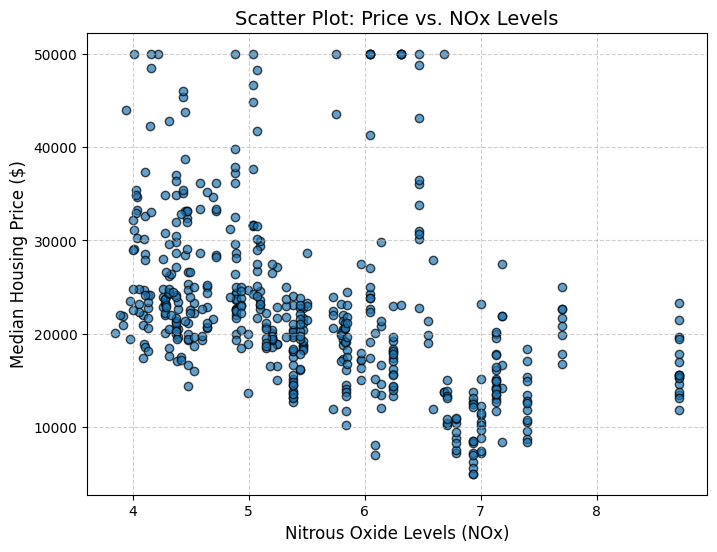

In [44]:
import pandas as pd

plt.figure(figsize=(8, 6))
plt.scatter(nox, price, alpha=0.7, edgecolors='k')
plt.title('Scatter Plot: Price vs. NOx Levels', fontsize=14)
plt.xlabel('Nitrous Oxide Levels (NOx)', fontsize=12)
plt.ylabel('Median Housing Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Question 9


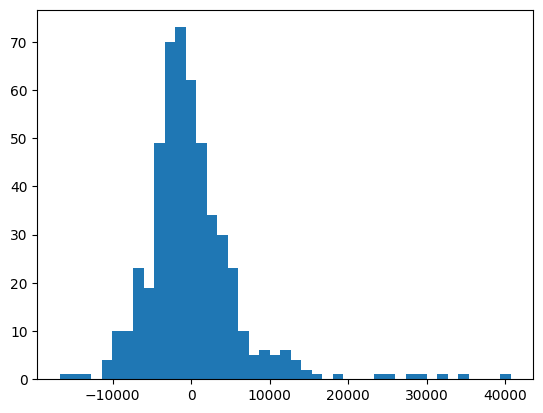

const : -18682.263753149855 
 crime : -136.54382776785508 
 nox : -660.4672465241154 
 rooms : 7797.928603057132 
 proptax : -89.41439612639125


In [45]:
constant=np.ones(np.shape(nox))
y=price
X=np.column_stack((constant, crime, nox, rooms, proptax))

beta = np.linalg.inv(X.T @ X)@X.T@y     
u=y-X@beta   #errors   y= XB + u

plt.hist(u,'auto')
plt.show()
print("const :", beta[0], "\n crime :", beta[1], "\n nox :", beta[2], "\n rooms :", beta[3],"\n proptax :",beta[4])


# Question 10

In [46]:
y=lprice
X=np.column_stack((constant, crime, nox, rooms, proptax))

beta = np.linalg.inv(X.T @ X)@X.T@y
print("const :", beta[0], "\n crime :", beta[1], "\n nox :", beta[2], "\n rooms :", beta[3],"\n proptax :",beta[4])

const : 8.65501051953367 
 crime : -0.012515599839625158 
 nox : -0.047578880095724765 
 rooms : 0.2815561773027773 
 proptax : -0.004262567678379837


# Question 11

In [47]:
y=lprice
X=np.column_stack((constant, crime, lnox, rooms, lproptax))

beta = np.linalg.inv(X.T @ X)@X.T@y
print("const :", beta[0], "\n crime :", beta[1], "\n lnox :", beta[2], "\n rooms :", beta[3],"\n lproptax :",beta[4])

const : 9.750516682879818 
 crime : -0.012801681555290045 
 lnox : -0.2769148930105432 
 rooms : 0.28017475936830816 
 lproptax : -0.17786952347181562


# Question 12


In [48]:
import numpy as np
from scipy.stats import t

constant=np.ones(np.shape(nox))
y=price
X=np.column_stack((constant, crime, nox, rooms, proptax))
beta = np.linalg.inv(X.T @ X) @ X.T @ y  
u = y - X @ beta

n, k = np.shape(X)
sigma_squared = u.T @ u / (n - k)
Var = sigma_squared * np.linalg.inv(X.T @ X)
std = np.sqrt(np.diag(Var))

pvaleurs_nox = t.sf(np.abs(beta[2]) / std[2], n - k) * 2  # Two-tailed test


print(f"Coefficient for nox: {beta[2]}")
print(f"Standard error for nox: {std[2]}")
print(f"p-value for nox: {pvaleurs_nox}")
print(n-k)


Coefficient for nox: -660.4672465241154
Standard error for nox: 314.63381312692934
p-value for nox: 0.036302434683150066
501


# Question 13

In [49]:
import statsmodels.api as sm

newX=np.column_stack((constant,crime, nox,rooms,crime+proptax))
model=sm.OLS(y,newX)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        21:48:16   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

# Question 14

In [50]:
from scipy.stats import f


# Unrestricted model
X_full = np.column_stack((constant, crime, nox, rooms, proptax))
beta_full = np.linalg.inv(X_full.T @ X_full) @ X_full.T @ y
u_full = y - X_full @ beta_full
SSR_full = u_full.T @ u_full  # Sum of squared residuals for unrestricted model

# Restricted model
X_restricted = np.column_stack((constant, crime, rooms))
beta_restricted = np.linalg.inv(X_restricted.T @ X_restricted) @ X_restricted.T @ y
u_restricted = y - X_restricted @ beta_restricted
SSR_restricted = u_restricted.T @ u_restricted  # Sum of squared residuals for restricted model

# F-statistic
n, k_full = X_full.shape
k_restricted = X_restricted.shape[1]
q = k_full - k_restricted  # Number of restrictions, here it's 2

F_stat = ((SSR_restricted - SSR_full) / q) / (SSR_full / (n - k_full))

# Critical value for the F-test at the 10% significance level
critical_F = f.ppf(0.90, q, n - k_full)  # One-tailed F-test


print("F-statistic:",F_stat)
print("Critical F-value at 10% significance level:",critical_F)


if F_stat > critical_F:
    print("Reject H0")
else:
    print("Fail to reject H0")


F-statistic: 19.311290349552785
Critical F-value at 10% significance level: 2.3132002236303255
Reject H0


# Question 15

In [51]:
SSR0=SSR_full # repris de la question précédente

X=np.column_stack((constant,crime,rooms))
y=price+500*nox+100*proptax
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())
u=results.resid
SSR1=u.T@u


F=((SSR1-SSR0)/2)/(SSR0/(n-k))
f.sf(F,2,n-k) #p value


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     238.6
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.37e-73
Time:                        21:48:16   Log-Likelihood:                -5119.8
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     503   BIC:                         1.026e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.924e+04   2495.944     -7.710      0.0

0.8618777787518017

# Question 16

In [52]:
# Models for the 2 groups
low_nox = df[df['nox'] <= np.percentile(df['nox'], 25)]
high_nox = df[df['nox'] > np.percentile(df['nox'], 25)]   # high means high + medium
X_low = np.column_stack((np.ones(np.shape(low_nox['nox'])), low_nox['crime'],low_nox['nox'], low_nox['rooms'], low_nox['proptax']))
y_low = low_nox['price']
X_high = np.column_stack((np.ones(np.shape(high_nox['nox'])), high_nox['crime'],high_nox['nox'], high_nox['rooms'], high_nox['proptax']))
y_high = high_nox['price']

model_low = sm.OLS(y_low, X_low).fit()
model_high = sm.OLS(y_high, X_high).fit()

SSR_low = np.sum(model_low.resid**2)
SSR_high = np.sum(model_high.resid**2)


# Combined model
X_combined = np.column_stack((constant,crime,nox,rooms, proptax))
y_combined = price
model_combined = sm.OLS(y_combined, X_combined).fit()
SSR_combined = np.sum(model_combined.resid**2)

# Chow test
n_low, k_low = X_low.shape  
n_high, k_high = X_high.shape  
n_combined, k_combined = X_combined.shape  

F_stat = ((SSR_combined - (SSR_low + SSR_high)) / k_combined) / ((SSR_low + SSR_high) / (n_low + n_high - 2 * k_combined))

# p-value
p_value = 1 - f.cdf(F_stat, k_combined, n_low + n_high - 2 * k_combined)

# Step 7: Print results
print("F-statistic:" ,F_stat)
print("p-value:",p_value)
if p_value < 0.10:
    print("Reject H0")
else:
    print("Fail to reject H0")

F-statistic: 5.569109275383501
p-value: 5.277261362468533e-05
Reject H0


# Question 17

In [53]:


# Create 4 new variables and create the unrestricted model
df['high_group'] = (df['nox'] > np.percentile(df['nox'], 25)).astype(int)
interaction_nox_high = df['nox'] * df['high_group']
interaction_proptax_high = df['proptax'] * df['high_group']
interaction_nox_low = df['nox'] * (1 - df['high_group'])
interaction_proptax_low = df['proptax'] * (1 - df['high_group'])

X_unrestricted = np.column_stack((constant,
    crime,
    rooms,
    interaction_nox_high,
    interaction_proptax_high,
    interaction_nox_low,
    interaction_proptax_low
))
y = price

model_unrestricted = sm.OLS(y, X_unrestricted).fit()
SSR_unrestricted = np.sum(model_unrestricted.resid**2)

#restricted model
X_restricted = X_combined

model_restricted = sm.OLS(y, X_restricted).fit()
SSR_restricted = np.sum(model_restricted.resid**2)

# F-statistic and p_value
n, k_unrestricted = X_unrestricted.shape  
k_restricted = X_restricted.shape[1]  
q = k_unrestricted - k_restricted  
F_stat = ((SSR_restricted - SSR_unrestricted) / q) / (SSR_unrestricted / (n - k_unrestricted))
p_value = 1 - f.cdf(F_stat, q, n - k_unrestricted)
print("F-statistic:", F_stat)
print("p-value:", p_value)

if p_value < 0.10:
    print("Reject H0")
else:
    print("Fail to reject H0")


F-statistic: 0.7814664776768353
p-value: 0.45829362403118445
Fail to reject H0


# PART II

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
import statsmodels.api as sm
from scipy.stats import f
# we used different files for the different parts. TO avoid any error, I'll import again all the libraries.

In [55]:
df =pd.read_csv(r'C:\Users\vince\Desktop\M1\MODS\ECO_4MO11_TP - Econometrics\TP econometrics\textfiles\HPRICE2.raw',delim_whitespace=True,header=None)

C:\Users\vince\AppData\Local\Temp\ipykernel_44884\1327560075.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =pd.read_csv(r'C:\Users\vince\Desktop\M1\MODS\ECO_4MO11_TP - Econometrics\TP econometrics\textfiles\HPRICE2.raw',delim_whitespace=True,header=None)


# Question 19

In [56]:
price = df[0]
crime = df[1]
nox = df[2]
rooms = df[3]
dist = df[4]                  
radial = df[5]            
proptax = df[6]                  
stratio = df[7]                  
lowstat = df[8]                  
lprice = df[9]                   
lnox = df[10]                    
lproptax = df[11]
l = len(price)
const = np.ones(l)
X = np.column_stack((const, crime, nox, rooms, proptax))
model = sm.OLS(price, X)
results = model.fit()

In [57]:
u=results.resid
u2=u**2
y=u2
model=sm.OLS(y,X)
n,k=np.shape(X)
results = model.fit()
print(results.summary())

u=results.resid
SSR1=u.T@u

model2=sm.OLS(y,const)
results2=model2.fit()
u2=results2.resid
SSR2=u2.T@u2

F=((SSR2-SSR1)/4)/(SSR1/(n-k)) 

print(F)

critical_F = f.ppf(0.90, 4, n - k)
print(critical_F)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.799
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           2.47e-05
Time:                        21:48:16   Log-Likelihood:                -10130.
No. Observations:                 506   AIC:                         2.027e+04
Df Residuals:                     501   BIC:                         2.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.885e+07   6.41e+07     -0.917      0.3

# Question 20

In [58]:
X = np.column_stack((const, crime, nox, rooms, proptax))
model = sm.OLS(lprice, X)
results = model.fit()
u = results.resid

In [59]:
u=results.resid
u2=u**2
y=u2
model=sm.OLS(y,X)
n,k=np.shape(X)
results = model.fit()
print(results.summary())

u=results.resid
SSR1=u.T@u

model2=sm.OLS(y,const)
results2=model2.fit()
u2=results2.resid
SSR2=u2.T@u2

F=((SSR2-SSR1)/4)/(SSR1/(n-k)) 


print(F)

critical_F = f.ppf(0.90, 4, n - k)
print(critical_F)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     17.98
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           8.33e-14
Time:                        21:48:16   Log-Likelihood:                 185.10
No. Observations:                 506   AIC:                            -360.2
Df Residuals:                     501   BIC:                            -339.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0757      0.090      0.842      0.4

# Question 21

In [60]:
X = np.column_stack((const, crime, lnox, rooms, lproptax))
model = sm.OLS(lprice, X)
results = model.fit()
u = results.resid

In [61]:
u=results.resid
u2=u**2
y=u2
model=sm.OLS(y,X)
n,k=np.shape(X)
results = model.fit()
print(results.summary())

u=results.resid
SSR1=u.T@u

model2=sm.OLS(y,const)
results2=model2.fit()
u2=results2.resid
SSR2=u2.T@u2

F=((SSR2-SSR1)/4)/(SSR1/(n-k)) 


print(F)

critical_F = f.ppf(0.90, 4, n - k)
print(critical_F)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     16.51
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.02e-12
Time:                        21:48:16   Log-Likelihood:                 184.66
No. Observations:                 506   AIC:                            -359.3
Df Residuals:                     501   BIC:                            -338.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5496      0.167     -3.289      0.0

# Question 23

In [62]:
model = sm.OLS(price, X)
results = model.fit()
u = results.resid
u_squared = u ** 2
t_stats = []

# Loop for each variable (excluding the constant)
for i in range(1, X.shape[1]):
    # Regress the squared residuals on the variable
    X_aux = X[:, [0, i]]  # Include the constant and the variable
    aux_model = sm.OLS(u_squared, X_aux)
    aux_results = aux_model.fit() 
    # t-statistic 
    t_stat = aux_results.tvalues[1]  # t-value 
    t_stats.append(t_stat)

# variable with the highest absolute t-statistic
max_t_stat = max(t_stats, key=abs)
most_significant_variable_index = t_stats.index(max_t_stat) + 1  # +1 to account for the constant
most_significant_variable_name = ['const', 'crime', 'nox', 'rooms', 'proptax'][most_significant_variable_index]

print(f"The most significant variable causing heteroskedasticity is: {most_significant_variable_name} with a t-statistic of {max_t_stat}")

The most significant variable causing heteroskedasticity is: proptax with a t-statistic of 4.742694862472702


C:\Users\vince\AppData\Local\Temp\ipykernel_44884\2855597246.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = aux_results.tvalues[1]  # t-value
C:\Users\vince\AppData\Local\Temp\ipykernel_44884\2855597246.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = aux_results.tvalues[1]  # t-value
C:\Users\vince\AppData\Local\Temp\ipykernel_44884\2855597246.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat =

In [63]:
weights = 1 / proptax
model_wls = sm.WLS(price, X, weights=weights)
results_wls = model_wls.fit()
##print(results_wls.summary())

u_wls = results_wls.resid
print(u)
print(u_wls)

0      -2233.797991
1      -4764.819150
2       2439.333187
3       2106.582899
4       3746.880250
           ...     
501    -4079.441466
502    -2235.211580
503    -5606.733715
504    -6024.703035
505   -10236.622355
Length: 506, dtype: float64
0     -2628.221476
1     -4759.294895
2      1268.494471
3      1228.284851
4      2635.618864
          ...     
501   -4634.025323
502   -2061.925219
503   -6764.935008
504   -6889.855080
505   -9924.072364
Length: 506, dtype: float64


# Part III

In [64]:
import pandas as pd
import numpy as np

df = pd.read_excel(r'C:\Users\vince\Desktop\M1\MODS\ECO_4MO11_TP - Econometrics\Project\data.xlsx')  # Chemin vers votre fichier
df.columns = ['year', 'real_gdp', 'unemployment_rate', 'cpi']
year = df['year']
real_gdp = df['real_gdp']
unemployment_rate = df['unemployment_rate']
cpi = df['cpi']

# Question 28

In [65]:
# moving average with order 20
window_size = 20
df['ma_real_gdp'] = df['real_gdp'].rolling(window=window_size, center=False).mean()
df['ma_unemployment_rate'] = df['unemployment_rate'].rolling(window=window_size, center=False).mean()
df['ma_cpi'] = df['cpi'].rolling(window=window_size, center=False).mean()

# stationary series (difference)
df['stationary_real_gdp'] = df['real_gdp'] - df['ma_real_gdp']
df['stationary_unemployment_rate'] = df['unemployment_rate'] - df['ma_unemployment_rate']
df['stationary_cpi'] = df['cpi'] - df['ma_cpi']
stat_real_gdp = df['stationary_real_gdp']
stat_unemployment_rate= df['stationary_unemployment_rate']
stat_cpi=df['stationary_cpi']

# Question 29

In [66]:
from statsmodels.tsa.stattools import adfuller

# function for the adf test
def adf_test(series, name):
    result = adfuller(series, autolag='AIC')  # ADF test from the imported library
    p_value = result[1]
    print("  p-value:",p_value,"     name :",name)

adf_test(real_gdp, "Real GDP")
adf_test(unemployment_rate, "Unemployment Rate")
adf_test(cpi, "CPI")

  p-value: 1.0      name : Real GDP
  p-value: 0.15239250945749505      name : Unemployment Rate
  p-value: 0.49067621955934254      name : CPI


# Question 32

In [67]:
# Here we resolve some issue concerning the format of the data which appeared on one of our computer
stat_real_gdp = np.where(np.isinf(stat_real_gdp), np.nan, stat_real_gdp)
stat_unemployment_rate = np.where(np.isinf(stat_unemployment_rate), np.nan, stat_unemployment_rate)
stat_cpi = np.where(np.isinf(stat_cpi), np.nan, stat_cpi)

stat_real_gdp = np.where(np.isnan(stat_real_gdp), np.nanmean(stat_real_gdp), stat_real_gdp)
stat_unemployment_rate = np.where(np.isnan(stat_unemployment_rate), np.nanmean(stat_unemployment_rate), stat_unemployment_rate)
stat_cpi = np.where(np.isnan(stat_cpi), np.nanmean(stat_cpi), stat_cpi)

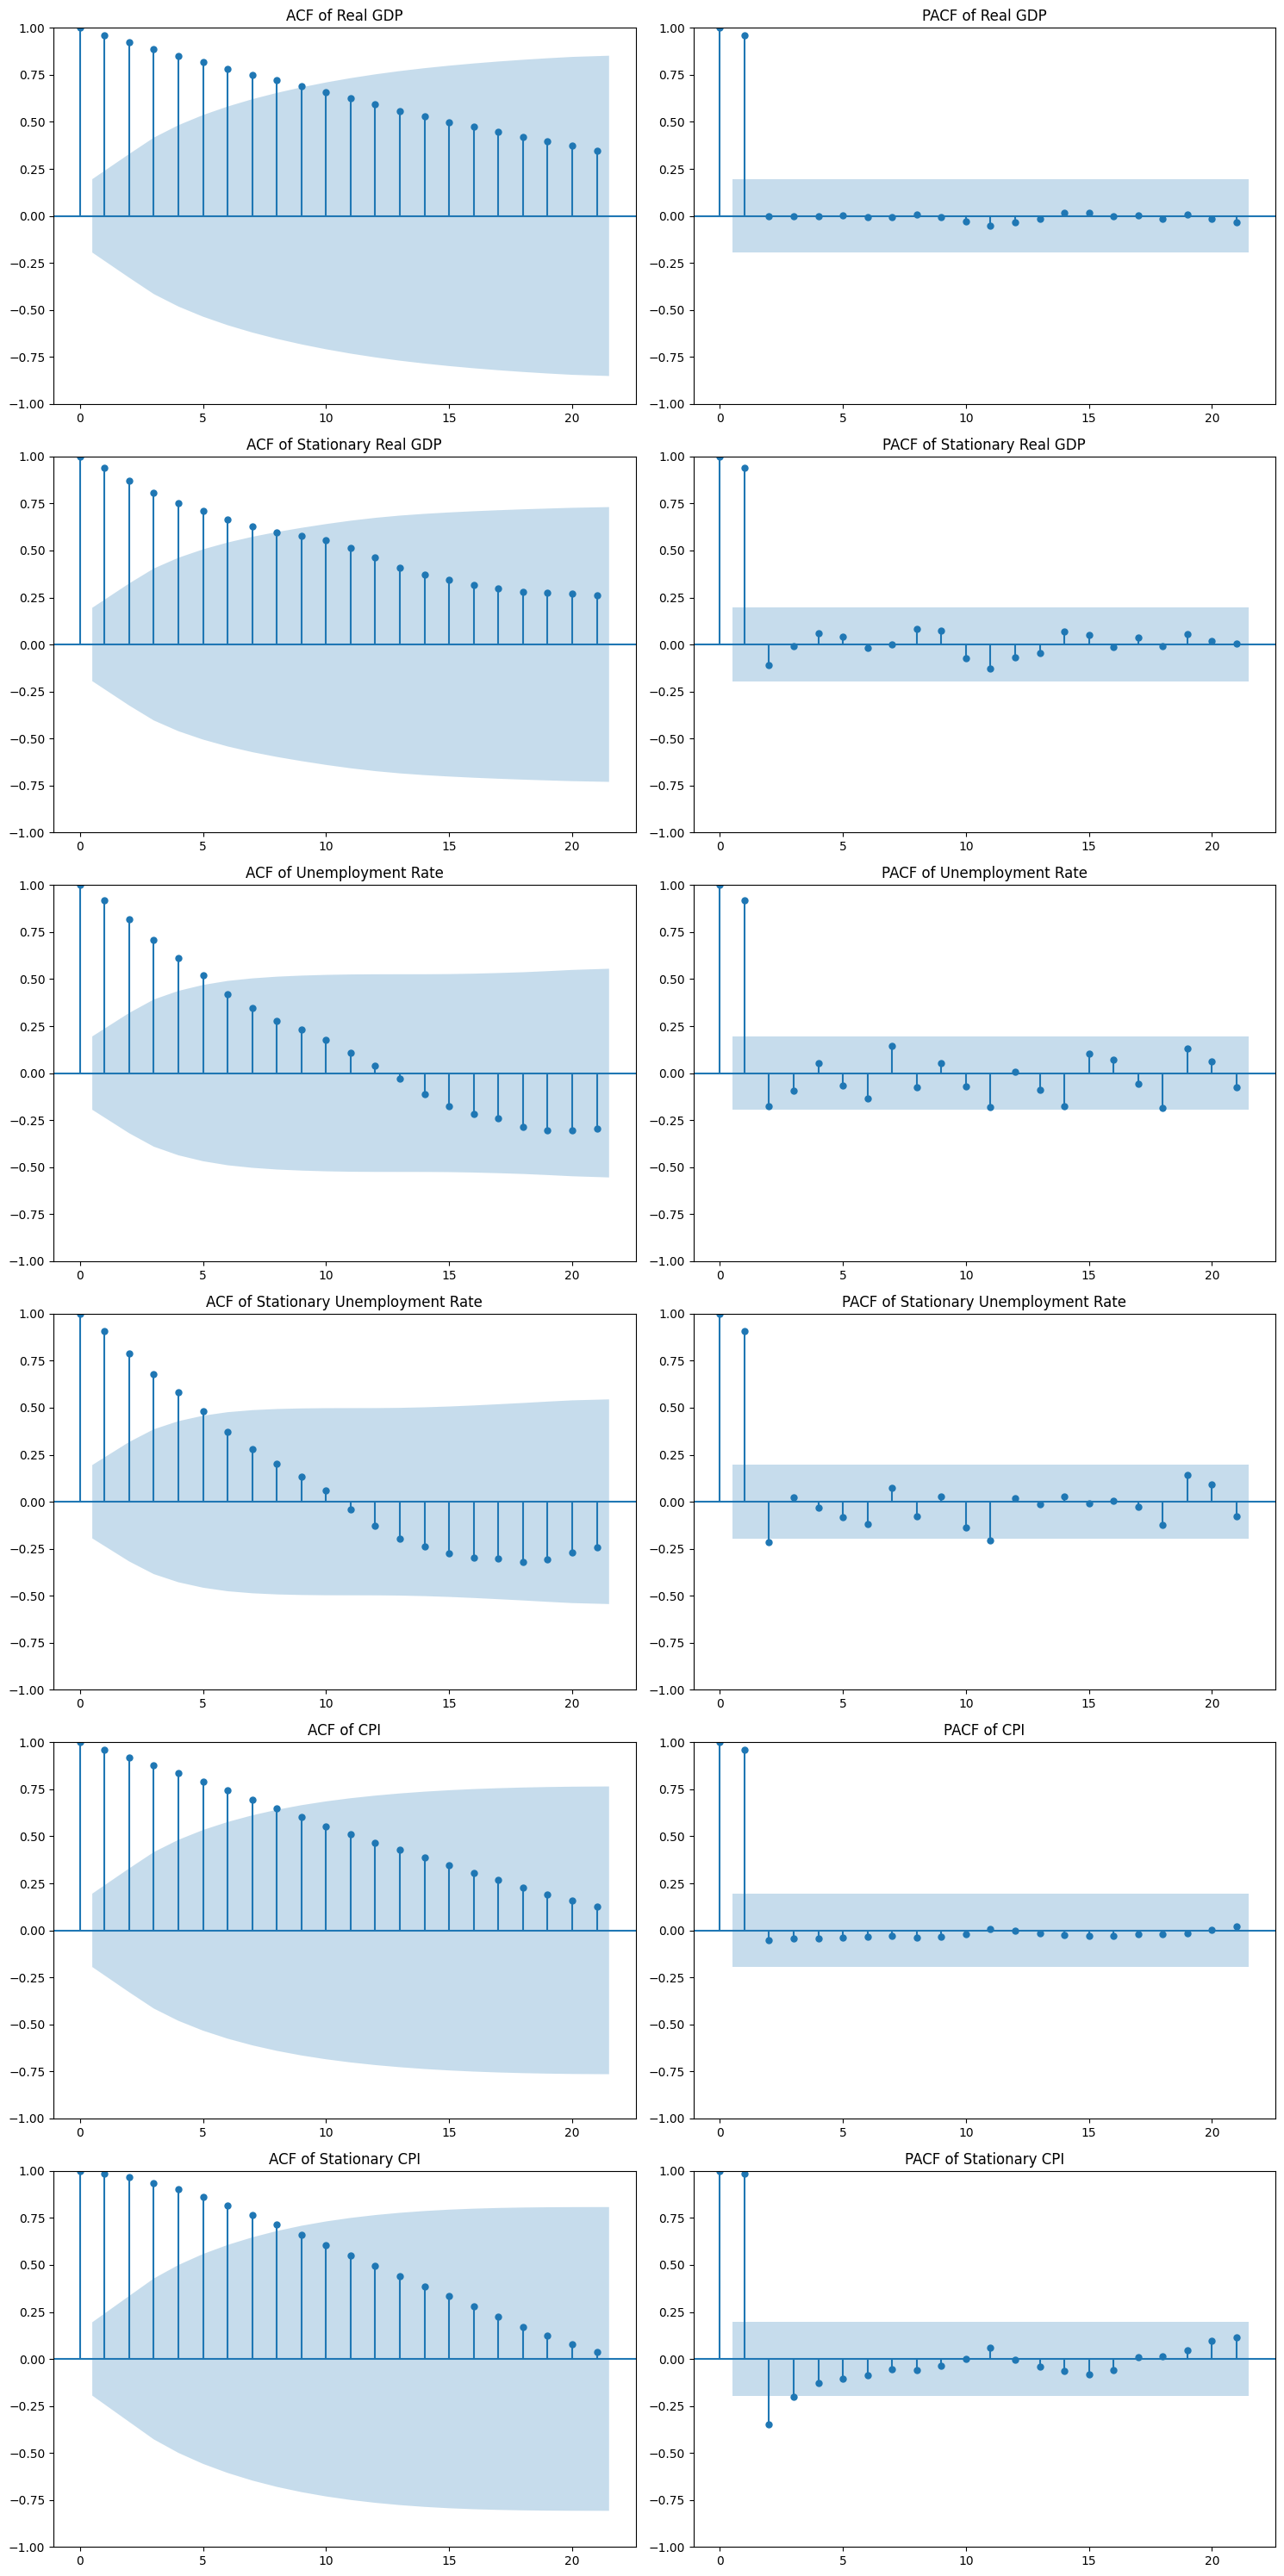

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# real_gdp
plot_acf(real_gdp.dropna(), ax=axes[0, 0])
axes[0, 0].set_title('ACF of Real GDP')
plot_pacf(real_gdp.dropna(), ax=axes[0, 1])
axes[0, 1].set_title('PACF of Real GDP')

# stat_real_gdp
stat_real_gdp_clean = stat_real_gdp[~np.isnan(stat_real_gdp)]
plot_acf(stat_real_gdp_clean, ax=axes[1, 0])
axes[1, 0].set_title('ACF of Stationary Real GDP')
plot_pacf(stat_real_gdp_clean, ax=axes[1, 1])
axes[1, 1].set_title('PACF of Stationary Real GDP')

# unemployment_rate
plot_acf(unemployment_rate.dropna(), ax=axes[2, 0])
axes[2, 0].set_title('ACF of Unemployment Rate')
plot_pacf(unemployment_rate.dropna(), ax=axes[2, 1])
axes[2, 1].set_title('PACF of Unemployment Rate')

# stat_unemployment_rate
stat_unemployment_rate_clean = stat_unemployment_rate[~np.isnan(stat_unemployment_rate)]
plot_acf(stat_unemployment_rate_clean, ax=axes[3, 0])
axes[3, 0].set_title('ACF of Stationary Unemployment Rate')
plot_pacf(stat_unemployment_rate_clean, ax=axes[3, 1])
axes[3, 1].set_title('PACF of Stationary Unemployment Rate')

# cpi
plot_acf(cpi.dropna(), ax=axes[4, 0])
axes[4, 0].set_title('ACF of CPI')
plot_pacf(cpi.dropna(), ax=axes[4, 1])
axes[4, 1].set_title('PACF of CPI')

# stat_cpi
stat_cpi_clean = stat_cpi[~np.isnan(stat_cpi)]
plot_acf(stat_cpi_clean, ax=axes[5, 0])
axes[5, 0].set_title('ACF of Stationary CPI')
plot_pacf(stat_cpi_clean, ax=axes[5, 1])
axes[5, 1].set_title('PACF of Stationary CPI')

plt.tight_layout()
plt.show()

# Question 35

In [69]:
from statsmodels.stats.stattools import durbin_watson

l = len(stat_real_gdp)
const = np.ones(l)
X = np.column_stack((const, stat_unemployment_rate, stat_cpi))
model = sm.OLS(stat_real_gdp, X)
results = model.fit()


dw_stat = durbin_watson(results.resid)
print(dw_stat)

0.13144110608702092


# Question 36

In [100]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson


# Step 1 :  OLS standard model
ols_res = sm.OLS(stat_real_gdp, X).fit()
resid_ols = ols_res.resid

# Step 2 : Estimating rho  with an AR(1) autocorrelation AR(1)
# We can estimate rho as the correlation between resid(t) et resid(t-1)
rho = np.corrcoef(resid_ols[1:], resid_ols[:-1])[0, 1]

# Step 3 :   Cochrane-Orcutt transformation
# Y* = Y_t - rho * Y_{t-1}
# X* = X_t - rho * X_{t-1}
Ystar = stat_real_gdp[1:] - rho * stat_real_gdp[:-1]
Xstar = X[1:] - rho * X[:-1]

# Step 4 : New model with the new data
gls_co_res = sm.OLS(Ystar, Xstar).fit()

# Durbin-Watson statistic
dw_stat_co = durbin_watson(gls_co_res.resid)
print("Durbin-Watson après correction AR(1) (Cochrane-Orcutt) :", dw_stat_co)
print(durbin_watson(ols_res.resid))

# the DW is nearer than 2, we have reduced the autocorrelation



Durbin-Watson après correction AR(1) (Cochrane-Orcutt) : 1.1242872508406916
0.13144110608702092


# Question 37

In [82]:
lag1_unemployment_rate = np.roll(unemployment_rate, 1)
lag2_unemployment_rate = np.roll(unemployment_rate, 2)
lag1_cpi = np.roll(cpi, 1)
lag2_cpi = np.roll(cpi, 2)
lag_1_real_gdp = np.roll(real_gdp, 1)
lag_2_real_gdp = np.roll(real_gdp, 2)

lag1_stat_unemployment_rate = np.roll(stat_unemployment_rate, 1)
lag2_stat_unemployment_rate = np.roll(stat_unemployment_rate, 2)
lag1_stat_cpi = np.roll(stat_cpi, 1)
lag2_stat_cpi = np.roll(stat_cpi, 2)
lag1_stat_real_gdp = np.roll(stat_real_gdp, 1)
lag2_stat_real_gdp = np.roll(stat_real_gdp, 2)

lag1_unemployment_rate[:1] = np.nan
lag2_unemployment_rate[:2] = np.nan
lag1_cpi[:1] = np.nan
lag2_cpi[:2] = np.nan


data = pd.DataFrame({
    "real_gdp": real_gdp,
    "lag1_unemployment_rate": lag1_unemployment_rate,
    "lag2_unemployment_rate": lag2_unemployment_rate,
    "lag1_cpi": lag1_cpi,
    "lag2_cpi": lag2_cpi
})

data = data.dropna()

# Question 38

As it is not told in the question, we used the lagged versions of non-stationary variables.

In [83]:
X = sm.add_constant(data[["lag1_unemployment_rate", "lag2_unemployment_rate", "lag1_cpi", "lag2_cpi"]])
y = data["real_gdp"]

model = sm.OLS(y, X)
results = model.fit()

print(l)
print(f"Nombre d'observations : {results.nobs}")

101
Nombre d'observations : 99.0


# Question 39

In [84]:
from statsmodels.tsa.stattools import grangercausalitytests

data_for_granger = df[['real_gdp', 'unemployment_rate']].dropna()

max_lag = 2
granger_test_result = grangercausalitytests(data_for_granger, max_lag, verbose=True)

p_values = [round(test[0]['ssr_ftest'][1], 4) for test in granger_test_result.values()]

if any(p < 0.01 for p in p_values):
    print("Reject the null hypothesis: Unemployment rate Granger-causes GDP.")
else:
    print("Fail to reject the null hypothesis: Unemployment rate does not Granger-cause GDP.")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8018  , p=0.0974  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=2.8884  , p=0.0892  , df=1
likelihood ratio test: chi2=2.8475  , p=0.0915  , df=1
parameter F test:         F=2.8018  , p=0.0974  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6092  , p=0.0789  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=5.4960  , p=0.0641  , df=2
likelihood ratio test: chi2=5.3488  , p=0.0689  , df=2
parameter F test:         F=2.6092  , p=0.0789  , df_denom=94, df_num=2
Fail to reject the null hypothesis: Unemployment rate does not Granger-cause GDP.


C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


# Question 40

In [85]:
df_1900_1960 = df.loc[df['year'] <= 1960]
df_1961_2000 = df.loc[df['year'] > 1960]

X_1900_1960 = df_1900_1960[['unemployment_rate', 'cpi']]
X_1961_2000 = df_1961_2000[['unemployment_rate', 'cpi']]
y_1900_1960 = df_1900_1960['real_gdp']
y_1961_2000 = df_1961_2000['real_gdp']

X_1900_1960 = sm.add_constant(X_1900_1960)
X_1961_2000 = sm.add_constant(X_1961_2000)

model_1900_1960 = sm.OLS(y_1900_1960, X_1900_1960).fit()
model_1961_2000 = sm.OLS(y_1961_2000, X_1961_2000).fit()

print("Model 1900-1960:")
print(model_1900_1960.summary())
print("\nModel 1961-2000:")
print(model_1961_2000.summary())

Model 1900-1960:
                            OLS Regression Results                            
Dep. Variable:               real_gdp   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     187.2
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           4.99e-26
Time:                        21:49:57   Log-Likelihood:                -718.56
No. Observations:                  61   AIC:                             1443.
Df Residuals:                      58   BIC:                             1449.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1

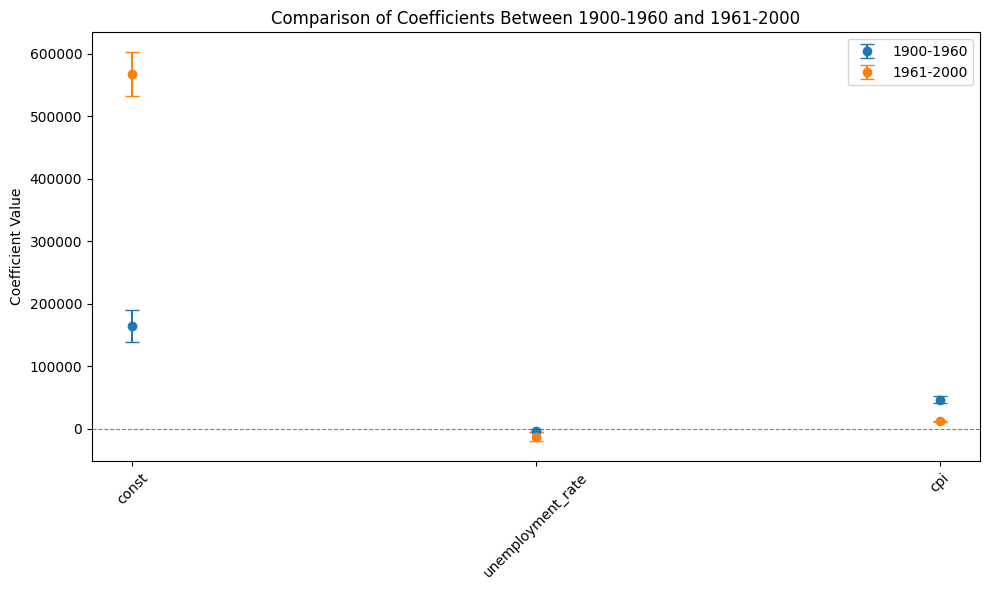

In [86]:
## View the coefficients 

coef_1900_1960 = model_1900_1960.params
conf_1900_1960 = model_1900_1960.conf_int()

coef_1961_2000 = model_1961_2000.params
conf_1961_2000 = model_1961_2000.conf_int()

variables = coef_1900_1960.index
x = range(len(variables))

plt.figure(figsize=(10, 6))

plt.errorbar(x, coef_1900_1960, 
             yerr=[coef_1900_1960 - conf_1900_1960[0], conf_1900_1960[1] - coef_1900_1960], 
             fmt='o', label='1900-1960', capsize=5)

plt.errorbar(x, coef_1961_2000, 
             yerr=[coef_1961_2000 - conf_1961_2000[0], conf_1961_2000[1] - coef_1961_2000], 
             fmt='o', label='1961-2000', capsize=5)

plt.xticks(x, variables, rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.title("Comparison of Coefficients Between 1900-1960 and 1961-2000")
plt.ylabel("Coefficient Value")
plt.legend()
plt.tight_layout()

plt.show()

In [87]:
## Test with the Chow test

S1 = model_1900_1960.ssr
S2 = model_1961_2000.ssr

X_pooled = df[['unemployment_rate', 'cpi']]
X_pooled = sm.add_constant(X_pooled)
y_pooled = df['real_gdp']

pooled_model = sm.OLS(y_pooled, X_pooled).fit()
S_p = pooled_model.ssr

k = len(pooled_model.params)
n1 = len(X_1900_1960)
n2 = len(X_1961_2000)

F = ((S_p - (S1 + S2)) / k) / ((S1 + S2) / (n1 + n2 - 2 * k))

p_value = 1 - f.cdf(F, k, n1 + n2 - 2 * k)

print(f"Chow Test F-statistic: {F}")
print(f"p-value: {p_value}")

Chow Test F-statistic: 173.8371526736523
p-value: 1.1102230246251565e-16


# Question 41

In [88]:
from statsmodels.stats.diagnostic import breaks_cusumolsresid

trim_ratio = 0.3

pooled_model = sm.OLS(y_pooled, X_pooled).fit()

residuals = pooled_model.resid
n = len(residuals)
trim_size = int(trim_ratio * n)
trimmed_residuals = residuals[trim_size: n - trim_size]

cusum_test = breaks_cusumolsresid(trimmed_residuals)
cusum_p_value = cusum_test[1]

print(f"CUSUM Test Statistic: {cusum_test[0]}")
print(f"CUSUM Test p-value: {cusum_p_value}")

CUSUM Test Statistic: 2.5806756344349844
CUSUM Test p-value: 3.2834157843698386e-06


# Question 42

In [78]:
df_1900_1932 = df.loc[df['year'] <= 1932]
df_1933_1965 = df.loc[(df['year'] >= 1933) & (df['year'] <= 1965)]
df_1966_1998 = df.loc[(df['year'] >= 1966) & (df['year'] <= 1998)]

print(len(df_1900_1932))
print(len(df_1933_1965))
print(len(df_1966_1998))

33
33
33


In [79]:
X_1933_1965 = df_1933_1965[['unemployment_rate', 'cpi']]
X_1966_1998 = df_1966_1998[['unemployment_rate', 'cpi']]
y_1933_1965 = df_1933_1965['real_gdp']
y_1966_1998 = df_1966_1998['real_gdp']

# Create both models and calculate their SSR
X_1933_1965 = sm.add_constant(X_1933_1965)
X_1966_1998 = sm.add_constant(X_1966_1998)
model_1933_1965 = sm.OLS(y_1933_1965, X_1933_1965).fit()
model_1966_1998 = sm.OLS(y_1966_1998, X_1966_1998).fit()
S1 = model_1933_1965.ssr
S2 = model_1966_1998.ssr

# Pooled model
X_pooled = pd.concat([X_1933_1965, X_1966_1998])
y_pooled = pd.concat([y_1933_1965, y_1966_1998])
pooled_model = sm.OLS(y_pooled, X_pooled).fit()
S_p = pooled_model.ssr

# Chow test 
k = len(pooled_model.params)
n1 = len(X_1933_1965)
n2 = len(X_1966_1998)
F = ((S_p - (S1 + S2)) / k) / ((S1 + S2) / (n1 + n2 - 2 * k))
p_value = 1 - f.cdf(F, k, n1 + n2 - 2 * k)

print("Chow Test F-statistic:",F)
print("p-value:",p_value)

Chow Test F-statistic: 160.30674790198898
p-value: 1.1102230246251565e-16
